In [10]:
import miRNET
import miRNET_enrichment
from matplotlib import pyplot as plt
import numpy as np

In [13]:
name = 'miR-208b' #кусок имени микроРНК
miR_targets = miRNET.Targets(name)
miR_targets = miR_targets.miR_targets
tis_gene_set = 'all'
#tis_gene_set = miRNET.tissue_selector() #если нужны гены какой-то конкретной ткань, то надо выполнить эту строчку

I found a miRNA with name: hsa-miR-208b-3p hsa-miR-208b-5p
and  161 unique targets


In [4]:
miR21_NET = miRNET.MainMirNetwork(G=miRNET.G, targets=miR_targets, CADgens=miRNET.CADgens, gene_set=tis_gene_set)

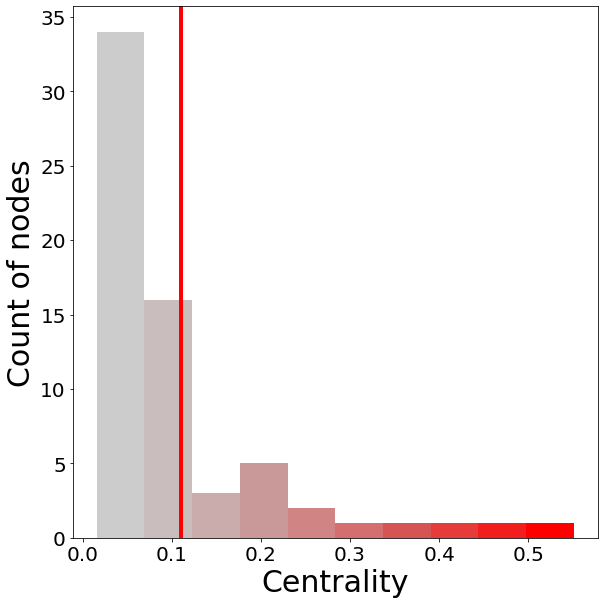

In [5]:
miRNET.draw_central_distr(miR_G=miR21_NET.LCC_miR_G,
                          key_nodes=miR21_NET.key_nodes,
                          mir_name='miR=21')

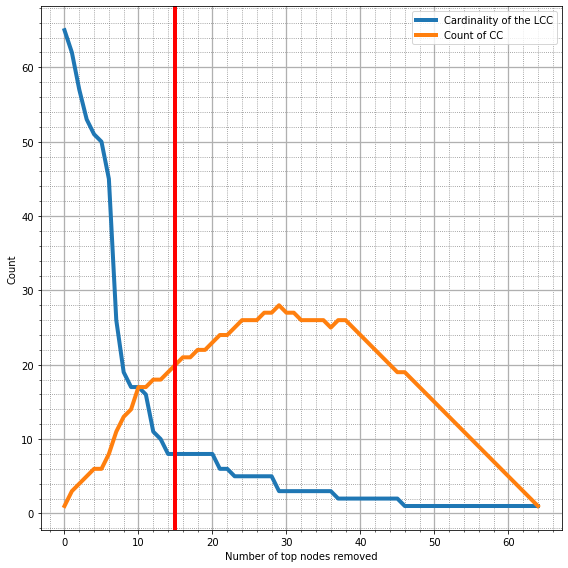

In [6]:
miRNET.draw_key_nodes_extractor(card_LCC=miR21_NET.graph_char['card_LCC'], 
                                n_CC=miR21_NET.graph_char['n_CC'], 
                                idx_max_dy=miR21_NET.graph_char['cutoff_point'], 
                                mir_name='miR21')

In [9]:
miRNET.draw_graph_to_cytoscape(miR_G=miR21_NET.LCC_miR_G, centrality_node=miR21_NET.centrality_node)

0  network components with less than two nodes have been removed


In [5]:
enrich_res = miRNET_enrichment.reactome_enrichment(miR21_NET.key_nodes.keys())

enrich_res = miRNET_enrichment.reac_pars(enrich_res)

G_enrich = miRNET_enrichment.get_net(enrich_res) #граф сигнальных путей

reactome_df = miRNET_enrichment.dendro_reactome_to_pandas(enrich_res, G_enrich)

<Figure size 432x288 with 0 Axes>

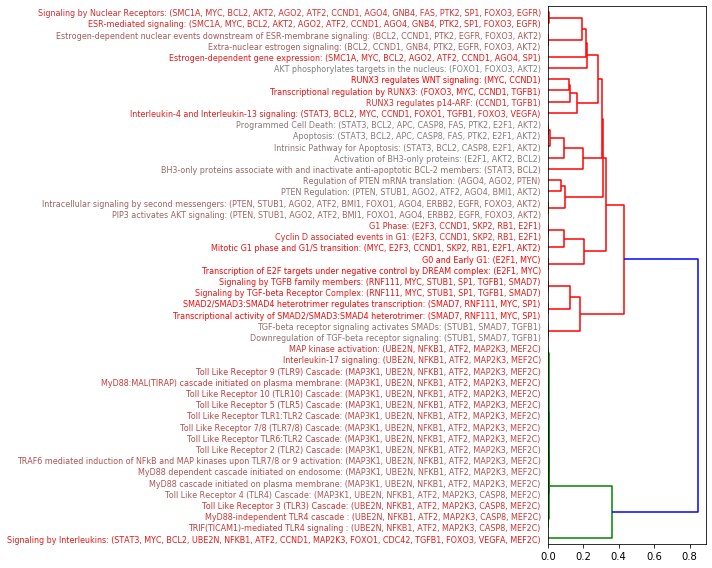

In [7]:
miRNET_enrichment.get_dendro(reactome_df, miR21_NET.key_nodes, 'miR21')